### 데이터 전처리

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

```python
class0_data = pd.read_csv('./datasets/만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./datasets/정회원.csv', index_col=0)
display(class0_data, class1_data)
```

In [3]:
class0_data = pd.read_csv('./만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./정회원.csv', index_col=0)
display(class0_data, class1_data)

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,44,학습생(만료),"01,44",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초등,초5,44,학습생(만료),"-,00,01,44",3,0,15,...,1.0,1.0,100.0,1.0,1.0,NaN,NaN,NaN,2022,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111846,fe0e970c-f546-4d32-8d15-a77889d1da78,M,초등,초5,44,학습생(만료),"11,44",0,0,0,...,6.0,10.0,71.0,59.0,46.0,NaN,NaN,NaN,2022,11
111847,fe10a0fd-b106-47a9-9440-4499e7bc42c7,M,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111848,ff02ec2b-0152-4028-b72f-79a6d78485b6,F,초등,초5,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111849,ff64565a-53f8-4362-8376-32432a231566,F,초등,초4,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11


,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,00030bf4-20ae-4b1d-a9e1-f9f8c6511cbd,M,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11",12,0,0,...,16.0,25.0,72.60,137.0,102.0,7.0,9.0,9.0,2022,5
1,000864c3-209f-48c5-9fe8-fbb78f0a34f2,M,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",22,0,0,...,7.0,17.0,78.12,117.0,92.0,NaN,NaN,NaN,2022,5
2,00162b6a-6d94-4d74-a612-8e4da80a231d,M,초등,초6,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-,11",22,0,0,...,6.0,10.0,51.30,78.0,37.0,2.0,17.0,17.0,2022,5
3,0022ec3b-7297-4bf0-a49c-406fec1b4278,M,초등,초2,11,학습생(정),"-,11,-,11,-,11",3,0,0,...,21.0,39.0,69.03,222.0,148.0,25.0,36.0,36.0,2022,5
4,002547f0-fc48-49c9-b8d8-66887209e61f,M,초등,초4,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",8,0,0,...,22.0,58.0,72.67,410.0,309.0,31.0,48.0,48.0,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,897aecf4-f213-48d3-9ee9-bbf7a3015313,F,초등,초3,11,학습생(정),11,0,0,0,...,9.0,24.0,74.08,173.0,133.0,NaN,NaN,NaN,2022,9
99996,89949613-340b-4d8d-9a16-450d35f95e25,F,초등,초3,11,학습생(정),11,0,0,0,...,16.0,52.0,66.69,301.0,227.0,NaN,NaN,NaN,2022,9
99997,899b9567-69b2-484c-87a8-368bb31ed469,M,초등,초1,11,학습생(정),11,0,0,0,...,24.0,54.0,83.78,307.0,254.0,NaN,NaN,NaN,2022,9
99998,89bb2f78-b0da-4cfa-9e8c-793656ad2c63,M,초등,초5,11,학습생(정),11,0,0,0,...,21.0,37.0,82.84,243.0,209.0,18.0,21.0,21.0,2022,9


In [5]:
class0_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111851 entries, 0 to 111850
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   userid                       111851 non-null  object 
 1   gender                       111851 non-null  object 
 2   membertype_codename          111851 non-null  object 
 3   grade_codename               111851 non-null  object 
 4   memberstatus                 111851 non-null  int64  
 5   memberstatus_codename        111851 non-null  object 
 6   memberstatus_change          111851 non-null  object 
 7   status_null_count            111851 non-null  int64  
 8   statusgroup_10_count         111851 non-null  int64  
 9   statusgroup_20_count         111851 non-null  int64  
 10  statusgroup_30_count         111851 non-null  int64  
 11  statusgroup_40_count         111851 non-null  int64  
 12  statusgroup_50_count         111851 non-null  int64  
 13 

'44'
'88'
'66'

In [8]:
class0_data['memberstatus_change']

0                 44
1                 44
2              01,44
3                 44
4         -,00,01,44
             ...    
111846         11,44
111847            44
111848            44
111849            44
111850          44,-
Name: memberstatus_change, Length: 111851, dtype: object

In [ ]:
## 당월 학습 중 탈퇴한 회원만 분석 포함
## 당초부터 탈퇴중이었던 회원 제외
class0_data = class0_data[(class0_data['memberstatus_change'] != '44') |
                          (class0_data['memberstatus_change'] != '88') |
                          (class0_data['memberstatus_change'] != '66')]

```python
dataset = pd.concat([class0_data, class1_data])
```

In [9]:
dataset = pd.concat([class0_data, class1_data])

```python
dataset['memberstatus_codename'].value_counts()
```

In [10]:
dataset['memberstatus_codename'].value_counts()

학습생(만료)       109892
학습생(정)        100000
학습생(미납_중지)      1067
학습생(탈퇴)          892
Name: memberstatus_codename, dtype: int64

In [11]:
len(dataset['memberstatus_codename'])

211851

In [12]:
# 만료, 탈퇴, 미납 회원을 0 나머지를 1로 타겟하기
dataset['target'] = dataset['memberstatus_codename'].apply(lambda x : 0 if x in ['학습생(만료)', '학습생(탈퇴)', '학습생(미납_중지)'] else 1 )

In [13]:
dataset[['target','memberstatus_codename']]

,target,memberstatus_codename
0,0,학습생(만료)
1,0,학습생(만료)
2,0,학습생(만료)
3,0,학습생(만료)
4,0,학습생(만료)
...,...,...
99995,1,학습생(정)
99996,1,학습생(정)
99997,1,학습생(정)
99998,1,학습생(정)


In [14]:
# 사용하고자 하는 피쳐(Feature)의 널값이 있다면 삭제하기
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])

In [15]:
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain', 
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count', 
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]

In [18]:
X

,point_gain_activeday_count,point_gain_count,point_gain,point_loss_activeday_count,point_loss_count,point_loss,tablet_activeday_count,tablet_moved_menu_count,tablet_leave_count,tablet_resume_count,...,video_volume_count,video_end_count,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count
24,8.0,73.0,890.0,1.0,1.0,-10.0,7.0,216.0,9.0,8.0,...,25.0,28.0,6.0,20.0,95.45,74.0,68.0,5.0,5.0,5.0
29,4.0,47.0,569.0,0.0,0.0,0.0,4.0,103.0,4.0,2.0,...,5.0,27.0,3.0,6.0,63.33,30.0,19.0,2.0,3.0,3.0
46,8.0,76.0,745.0,0.0,0.0,0.0,9.0,216.0,12.0,9.0,...,3.0,37.0,7.0,22.0,76.36,143.0,110.0,1.0,1.0,1.0
57,8.0,92.0,1079.0,3.0,9.0,-1050.0,7.0,596.0,17.0,17.0,...,24.0,66.0,6.0,13.0,86.15,67.0,59.0,3.0,4.0,4.0
89,9.0,150.0,1524.0,1.0,1.0,-50.0,9.0,329.0,37.0,36.0,...,25.0,35.0,8.0,18.0,85.00,106.0,91.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,18.0,97.0,891.0,2.0,5.0,-20900.0,17.0,127.0,15.0,2.0,...,16.0,62.0,13.0,24.0,83.54,114.0,94.0,10.0,11.0,11.0
99993,18.0,98.0,656.0,0.0,0.0,0.0,18.0,123.0,31.0,14.0,...,70.0,84.0,17.0,35.0,80.20,149.0,123.0,2.0,3.0,2.0
99994,17.0,138.0,2167.0,0.0,0.0,0.0,16.0,226.0,18.0,6.0,...,3.0,66.0,14.0,29.0,82.28,150.0,122.0,12.0,16.0,16.0
99998,22.0,147.0,2045.0,0.0,0.0,0.0,29.0,156.0,48.0,42.0,...,15.0,105.0,21.0,37.0,82.84,243.0,209.0,18.0,21.0,21.0


In [19]:
Y = dataset['target']
Y

24       0
29       0
46       0
57       0
89       0
        ..
99992    1
99993    1
99994    1
99998    1
99999    1
Name: target, Length: 71476, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state= 156)

### 모델 적용

#### Bagging(배깅)

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측. 
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)
```

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측. 
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)

Bagging 분류기 정확도: 0.9450
Bagging 분류기 Recall: 0.9757
Bagging 분류기 Precision: 0.9635
Bagging 분류기 AUC: 0.8275
Bagging 분류기 Confusion Matrix: 
 [[ 1004   474]
 [  312 12506]]


In [23]:
# 개별 모델의 학습/예측/평가.
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
class_name= lr_clf.__class__.__name__

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('{0} 정확도: {1:.4f}'.format(class_name, accuracy))
print('{0} Recall: {1:.4f}'.format(class_name, recall))
print('{0} Precision: {1:.4f}'.format(class_name, precision))
print('{0} AUC: {1:.4f}'.format(class_name, auc))
print('{0} Confusion Matrix:'.format(class_name),'\n', matrix)

LogisticRegression 정확도: 0.9426
LogisticRegression Recall: 0.9771
LogisticRegression Precision: 0.9597
LogisticRegression AUC: 0.8106
LogisticRegression Confusion Matrix: 
 [[  952   526]
 [  294 12524]]


#### 랜덤 포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)

랜덤 포레스트 정확도: 0.9584
랜덤 포레스트 Recall: 0.9796
랜덤 포레스트 Precision: 0.9741
랜덤 포레스트 AUC: 0.8768
랜덤 포레스트 Confusion Matrix: 
 [[ 1144   334]
 [  261 12557]]


In [25]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]

tablet_activeday_count        0.199685
point_gain_activeday_count    0.139927
test_activeday_count          0.091256
study_activeday_count         0.080932
media_activeday_count         0.079582
test_count                    0.037758
test_item_count               0.036292
tablet_moved_menu_count       0.033327
study_completed_count         0.027913
point_gain                    0.027747
video_start_count             0.025991
tablet_login_count            0.020898
test_correct_count            0.019712
media_count                   0.019187
video_end_count               0.014345
point_loss                    0.014170
study_restart_count           0.013612
tablet_logout_count           0.013262
study_notcompleted_count      0.012487
study_count                   0.011492
dtype: float64

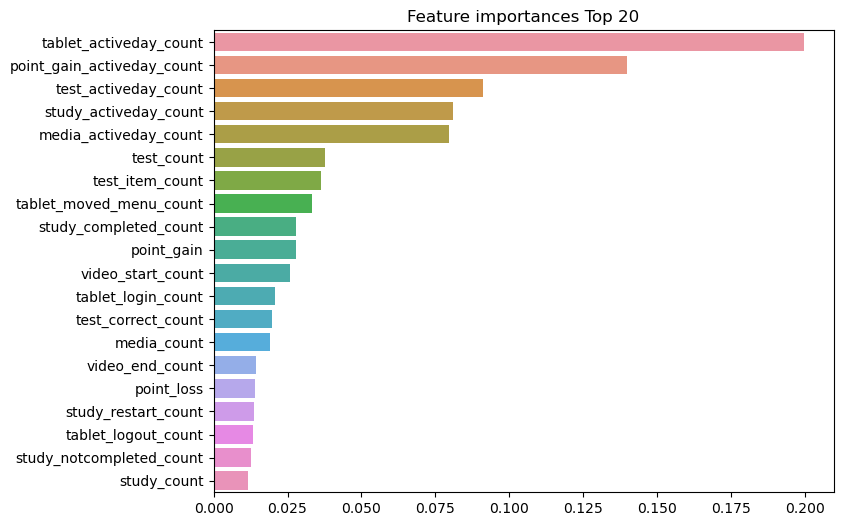

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 그래디언트 부스팅

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9650
GBM Recall: 0.9836
GBM Precision: 0.9775
GBM AUC: 0.8937
GBM Confusion Matrix: 
 [[ 1188   290]
 [  210 12608]]
GBM 수행 시간: 21.1 초 
